# Logistic Regression Assignment

## General Instructions for this assignment:
1. Don't change the function signature
2. Don't change the code already given to you; A lot of the work has been done for you, as we assume you are reasonably familiar with it.
3. Write the code only where asked

## 1. Basic Design of the Model
1. Output of the model: 0 or 1 (Binary Classification)
2. Hypothesis to be tested: $Z = W \cdot X + b$
3. Activation Function: \frac{1}{1 + e^{-x}} $ (Signmoid Function)

## 2. Import Packages

1. numpy: obviously
2. matplotlib: for making graphs
3. seaborn: Making matplotlib graphs prettier

In [1]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

# Next Libraries are unimportant, they just make everyhting look better

import matplotlib.style as style
import seaborn as sns

style.use('seaborn-poster') #sets the size of the charts
style.use('ggplot')

## 3. Loading the dataset

We have prepared and preprocessed the data. You can use the `np.load(path)` to obtain a dictionary of numpy arrays.

> The loading has been done for you, just ensure that the path is correct and obtain the nump arrays from the dictionary

In [30]:
dataset = np.load('quickdraw/10k/dataset.npz')

## Get the numpy arrays from the dictionary
X_train = dataset['X_train']
Y_train = dataset['Y_train']
X_test = dataset['X_test']
Y_test = dataset['Y_test']

In [31]:
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(784, 8000)
(1, 8000)
(784, 2000)
(1, 2000)


If you loaded the data correctly, then the code below should display
```
(784, 8000)
(1, 8000)
(784, 2000)
(1, 2000)
```

## 4. Get a feel of the data

### 5.1 View the Imagethat
Use the imshow function of matplotlib.pyplot to actually see one of the 28x28 images from the training dataset and its respectie label.

Label: cat


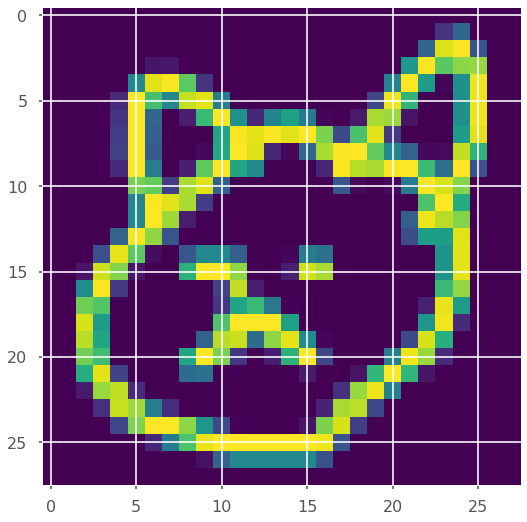

In [4]:
idx = np.random.randint(X_train.shape[1])

plt.imshow(X_train[:, idx].reshape(28, 28))

label = "cat" if Y_train[:, idx][0] else "bat"
print(f"Label: {label}")

### View the raw data

View the actual raw array associated with the idx selected previously

In [32]:
X_train[:, idx]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  38,
        84,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
        83, 242, 254,  66,   0,   0,   0,   0,   0,   0,   0,   0,  15,
        16,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         1, 136, 254, 190, 211, 215,   0,   0,   0,   0,   0,   0,   1,
       121, 244, 253, 191,  38,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0, 113, 255, 141,   4, 128, 249,   0,   0,   0,   0,   0,
         0,  30, 255, 179, 118, 233, 245, 109,   1,   0,   0,   0,   0,
         0,   0,   0,  54, 249, 167,   0,   0, 128, 249,   0,   0,   0,
         0,   0,   0,  38, 255,  84,   0,  21, 172, 255, 131,  2

## 6. Normalizing the data

Normalizing the data with the following equation:

$$ X_{norm} = \frac {X - X_{min}}{X_{max} - X_{min}} $$

For this pixel data, $X_{max} = 255$ and $X_{min} = 0$

> After running the next cell, go back and view the raw array again

In [34]:
## Normalize the training and testning data
X_train = X_train / 255
X_test = X_test / 255

## 7. Helper functions for the Model:

### Write the respective functions described by their docstrings

In [8]:
def sigmoid(z):
    """
    Computes the element sigmoid of scalar or numpy array(element wise)
    
    Arguments:
        z: Scalar or numpy array
    
    Returns:
        s: Sigmoid of z (element wise in case of Numpy Array)
    """
    ### Write Code here ###
    s = 1. / (1 + np.exp(-z))
    ### End Code here ###
    
    return s

In [12]:
def initialize_parameters(n_x):
    """
    Initialize w to a zero vector, and b to a 0 with datatype float 
    
    Arguments:
        n_x: Number of features in each sample of X
    
    Returns:
        w: Initialized Numpy array of shape (1, n_x) (Weight)
        b: Initialized Scalar (bias)
    """
    ### Write Code here ###
    w = np.zeros((1, n_x))
    b = 0.
    ### End Code here ###
    
    return w, b

In [10]:
def compute_cost(A, Y):
    """
    Calculate the Cost using the Cross Entropy Loss
    
    Arguments:
        A: Computer Probabilities, numpy array
        Y: Known Labels, numpy array
        
    Returns:
        cost: The computed Cost
    """
    ### Write Code here ###
    m = A.shape[1]
    J = -np.sum(Y * np.log(A) + (1 - Y) * np.log(1 - A)) / m
    ### End Code here ###
    
    return np.squeeze(J)

Here is a summary of the equations for Forward Propagation and Backward Propagation we have used so far:

For m training examples $ X_{train} $ and $ Y_{train} $:

### 7.1 Forward Propagation

$$ Z^{(i)} = w \cdot X_{train}^{(i)} + b $$

$$ \hat Y^{(i)} = A^{(i)} = \sigma(Z^{(i)}) = sigmoid(Z^{(i)}) $$

$$ \mathcal{L}(\hat Y^{(i)}, Y_{train}^{(i)}) = \mathcal{L}(A^{(i)}, Y_{train}^{(i)}) = -[Y_{train}^{(i)} \log(A^{(i)}) + (1 - Y_{train}^{(i)}) \log(1 - A^{(i)})] $$

$$ J = \frac{1}{m} \sum_1^m \mathcal{L} (A^{(i)}, Y_{train}^{(i)}) $$


### 7.2 Backward Propagation - Batch Gradient Descent

$$ \frac{\partial J}{\partial w} = \frac{1}{m} (A - Y) \cdot X^T $$

$$ \frac{\partial J}{\partial b} = \frac{1}{m} \sum_1^m (A - Y) $$


> Note: Represent $ \frac{\partial J}{\partial w} $ as dw, and $ \frac{\partial J}{\partial b}$ as db


In [13]:
def propagate(w, b, X, Y):
    """
    Perform forward and backward propagation for the Logistic Regression model
    
    Arguments:
        w: The Weight Matrix of dimension (1, n_x)
        b: Bias
        X: Input Matrix, with shape (n_x, m)
        Y: Label Matrix of shape (1, m)
        
    Returns:
        dw: Gradient of the weight matrix
        db: Gradient of the bias
        cost: Cost computed on Calculated Probability, and output Label
    """
    
    ### Write Code here ###
    m = X.shape[1]
    
    # forward Propagate
    Z = w @ X + b
    A = sigmoid(Z)
    
    # Calculate Cost
    cost = compute_cost(A, Y)
    
    # Backward Propagate
    dw = (A - Y) @ X.T / m
    db = np.sum(A - Y) / m
    ### End Code here ###
    
    assert dw.shape == w.shape
    return dw, db, cost
    

### 7.3 Optimization

For a parameter $ \theta $, the gradient descent update rule is given by:
$$ \theta := \theta - \alpha \frac{\partial J}{\partial \theta} $$

where $\alpha$ is the learning rate

In [20]:
def fit(w, b, X, Y, num_iterations, learning_rate, print_freq=100):
    """
    Given the parameters of the model, fit the model corresponding to the given Input Matrix aand output labels, by performing batch gradient descent for given number of iterations.
    
    Arguments:
        w: The Weight Matrix of dimension (1, n_x)
        b: Bias
        X: Input Matrix, with shape (n_x, m)
        Y: Label Matrix of shape (1, m)
        num_iterations: The number of iteratios of bgd to be performed
        print_freq: Frequency of recording the cost
    Returns:
        w: Optimized weight matrix
        b: optimized bias
        costs: print the cost at frequency given by print_freq, no prints if freq is 0
    """
    
    costs = []
    for i in range(num_iterations):
        ## 1. Calculate Gradients and cost
        ### Write Code here ###
        dW, db, cost = propagate(w, b, X, Y)  
        ### End Code here ###

        costs.append(cost)
            
        if print_freq and i % print_freq == 0:
            print(f"Cost after iteration {i}: {cost}")
                
        ## 2. Update parameters
        ### Write Code here ###
        w -= learning_rate * dW
        b -=learning_rate * db   
        ### End Code here ###      

            
    return w, b, costs
        

### 7.4 Prediction
Use the following equation to determine the class that a given sample belongs to:

$$
\begin{equation}
    Y_{prediction}^{(i)} =
    \begin{cases} 
        1 \text{, if } \hat Y^{(i)} \ge 0.5\\
        0 \text{, if } \hat Y^{(i)} \lt 0.5\\
    \end{cases}
\end{equation}
$$

> Hint: Use boolean Masking

In [27]:
def predict(w, b, X):
    """
    Predict the class which the given feature vector belongs to given Weights and Bias of the model
    
    Arguments:
        w: The Weight Matrix of dimension (1, n_x)
        b: Bias
        X: Input Matrix, with X.shape[0] = n_X
    Returns:
        Y_prediction: Predicted labels
    """
    
    ### Write Code here ###
    m = X.shape[1]
    Y_prediction = np.zeros((1, m))
    
    A = sigmoid(w @ X + b)
    
    Y_prediction = (A>0.5).astype('int')
    ### End Code here ###
    
    return Y_prediction

## 8. Building the Model

Now we have assembled all the individual pieces required to create the Logistic Regression model.
Next function is creating the model and calculating its train and test accuracy. 

Acuracy is the ratio of correctly guessed samples, to the total number of samples that were checked. 

In [71]:
def model(X_train, Y_train, X_test, Y_test, num_iterations, learning_rate, print_freq):
    """
    Create a model and fit it to the train and test data. Use this model to compute the train and test accuracy after 2500 iterations
    
    Arguments:
        X_train: Training Data X
        Y_train: Training Data Y
        X_test: Testing Data X
        Y_test: Testing data Y
        num_iterations: Number of iterations of bgd to perform
        learning_rate: Learning Rate of the model
        print_freq: Frequency of recording the cost
    Returns:
        -None-
    """
    
    ### Write Code here ###
    n_x = X_train.shape[0]
    w, b = initialize_parameters(n_x)
    
    w, b, costs = fit(w, b, X_train, Y_train, num_iterations, learning_rate, print_freq)
    
    ### End Code here ###
    
    Y_prediction_train = predict(w, b, X_train)
    Y_prediction_test = predict(w, b, X_test)
    
    costs = np.squeeze(costs)
    
    train_accuracy = 100 - np.mean(np.abs(Y_prediction_train - Y_train)) * 100
    test_accuracy = 100 - np.mean(np.abs(Y_prediction_test - Y_test)) * 100
    
    print(f"train accuracy: {train_accuracy}")
    print(f"test accuracy: {test_accuracy}")
    
#     plt.plot(costs)
    
#     plt.ylabel('cost')
#     plt.xlabel('iterations (per hundreds)')
#     plt.title(f"Learning rate = {learning_rate}")
#     plt.show()
    
    return train_accuracy, test_accuracy, costs
       

Cost after iteration 0: 0.6931471805599454
Cost after iteration 100: 0.642745388955578
Cost after iteration 200: 0.604597436998133
Cost after iteration 300: 0.5748597885755945
Cost after iteration 400: 0.5512121379285803
Cost after iteration 500: 0.5320488779329117
Cost after iteration 600: 0.516236021115039
Cost after iteration 700: 0.5029654718680693
Cost after iteration 800: 0.491655073784976
Cost after iteration 900: 0.48188003133470847
Cost after iteration 1000: 0.4733261008022247
Cost after iteration 1100: 0.46575757796145784
Cost after iteration 1200: 0.45899524822033905
Cost after iteration 1300: 0.45290104571654416
Cost after iteration 1400: 0.4473672573243947
Cost after iteration 1500: 0.4423088336905681
Cost after iteration 1600: 0.4376578471576066
Cost after iteration 1700: 0.43335945012619786
Cost after iteration 1800: 0.4293688942327051
Cost after iteration 1900: 0.4256493081118412
Cost after iteration 2000: 0.42217002364292
Cost after iteration 2100: 0.4189053029947497
C

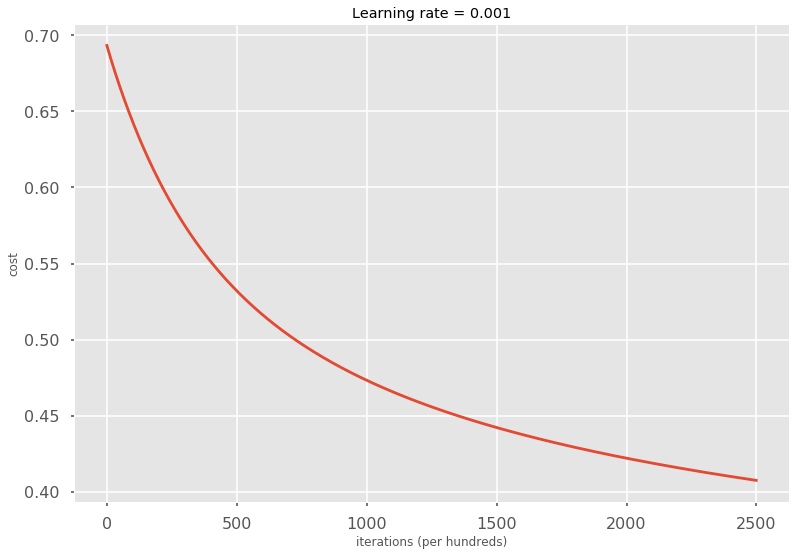

In [69]:
_ = model(X_train, Y_train, X_test, Y_test, num_iterations=2500, learning_rate=0.001, print_freq=100)

## 9. Experiments (Not Graded)

Try using different Learning Rates, Change the number of iterations, try a different initialization of the parameters, try Stochastic Gradient Descent on the same Model. The possibilities are endless, and we encourage you to explore as much as you can. You can even try to use the Logistic Regression Model implementation from the ScikitLearn library, or explore other optimizing algorithms! If you try something new, do send it along with the assignment. We'd love to see what kinda work you are doing! Till then, adios!

----------------------------------------
Learning Rate: 0.01
train accuracy: 86.1375
test accuracy: 87.25
----------------------------------------
Learning Rate: 0.015
train accuracy: 86.4125
test accuracy: 87.35
----------------------------------------
Learning Rate: 0.025
train accuracy: 86.575
test accuracy: 87.55
----------------------------------------
Learning Rate: 0.035
train accuracy: 86.7625
test accuracy: 87.55
----------------------------------------
Learning Rate: 0.045
train accuracy: 86.925
test accuracy: 87.6
----------------------------------------
Learning Rate: 0.05
train accuracy: 87.0
test accuracy: 87.55


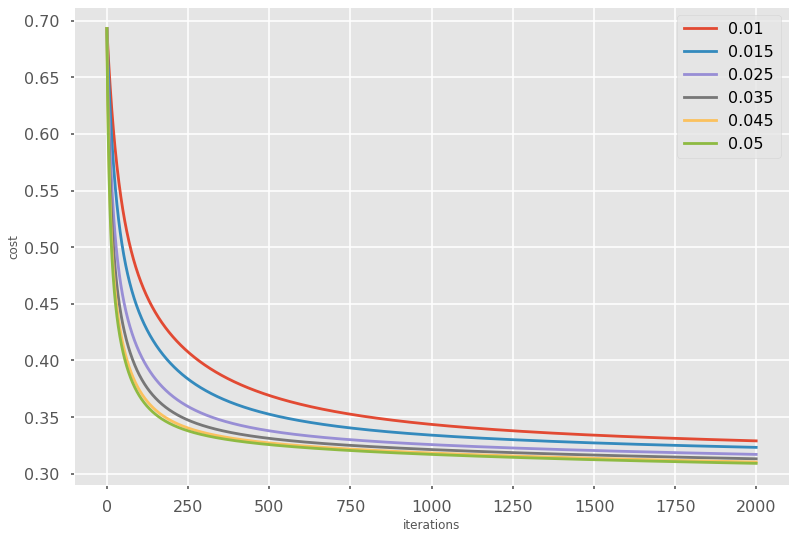

In [76]:
learning_rates = [0.01, 0.015, 0.025, 0.035, 0.045, 0.05]
loss_plot = {}


for learning_rate in learning_rates:
    print(f"{'-' * 40}\nLearning Rate: {learning_rate}")
    
    train_accuracy, test_accuracy, costs = model(X_train, Y_train, X_test, Y_test, num_iterations=2000, learning_rate=learning_rate, print_freq=0)
    
#     print(f"Train Accuracy: {train_accuracy}\nTest Accuracy: {test_accuracy}\n", "-" * 80)
    
    plt.plot(costs)
    
plt.legend(learning_rates)
plt.ylabel('cost')
plt.xlabel('iterations')
# plt.title(f"Learning rate = {learning_rate}")
plt.show()